In [1]:
import numpy as np
from numpy import linalg as npl #J equiv: LinearAlgebra
import matplotlib.pyplot as plt

# 3.1 Norm

Properties:
1. Nonnegative Homogeneity: ||Bx|| = |B|||x||
2. Triangle inequality: ||x+y|| <= ||x|| + ||y||
3. Nonnegative: ||x|| >= 0
4. Definite: ||x|| = 0 iff x = 0 

In [2]:
#Nonnegative homogeneity: ||Bx|| = |B|||x||
x = [2,-1,2]
npl.norm(x), np.sqrt(np.inner(x,x)), np.sqrt(sum(np.array(x)**2))
#norm(x),sqrt(x'*x),sqrt(sum(x.^2)) <- J equivs

(3.0, 3.0, 3.0)

In [3]:
#Triangle inequality: ||x+y|| <= ||x|| + ||y||
x,y = np.random.randn(10), np.random.randn(10)
npl.norm(x+y), npl.norm(x) + npl.norm(y)

(4.205159460916585, 5.639880023454475)

In [4]:
#Root Mean Square like norm but within sqrt divide by amount of values in vector
#Gives a standard value for magnitude to compare to other vectors
#what a "typical" value for abs(xi) would be
rms = lambda x: npl.norm(x) / np.sqrt(len(x))
t = np.linspace(0,1,101) #t = 0:.01:1
x = np.cos(8*t) - 2*np.sin(11*t)
np.average(x), rms(x), x

(-0.042529437832386816,
 1.0837556422598,
 array([ 1.        ,  0.7772451 ,  0.55076804,  0.32325192,  0.09735649,
        -0.12431346, -0.33923878, -0.54501537, -0.739382  , -0.92024623,
        -1.08570801, -1.23408086, -1.36391021, -1.47398886, -1.56336921,
        -1.6313723 , -1.67759342, -1.70190437, -1.7044522 , -1.68565468,
        -1.64619233, -1.58699731, -1.50923924, -1.41430817, -1.30379488,
        -1.17946882, -1.04325395, -0.8972028 , -0.74346905, -0.58427899,
        -0.42190233, -0.25862246, -0.09670686,  0.06162219,  0.21421621,
         0.35902793,  0.49413741,  0.61777625,  0.7283499 ,  0.82445752,
         0.90490937,  0.96874134,  1.01522657,  1.04388392,  1.05448331,
         1.04704772,  1.02185198,  0.97941823,  0.92050825,  0.84611263,
         0.75743703,  0.65588565,  0.54304213,  0.42064812,  0.2905798 ,
         0.15482271,  0.01544505, -0.12543001, -0.26565282, -0.40307609,
        -0.53558374, -0.66111939, -0.7777141 , -0.88351311, -0.97680105,
        -

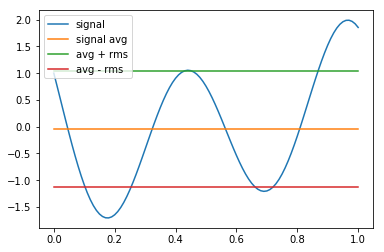

In [5]:
plt.plot(t,x) #some signal
plt.plot(t, np.average(x)*np.ones(len(x))) #average of the signal:yellow
plt.plot(t, (np.average(x)+rms(x))*np.ones(len(x))) #average + rms:green
plt.plot(t, (np.average(x)-rms(x))*np.ones(len(x))) #average - rms:red
plt.legend(('signal','signal avg', 'avg + rms', 'avg - rms'),
           loc='upper left')

In [6]:
#Chebyshev's gives an upper bound for 
#how many of some value would be expected in a vector
cheb_bound = lambda x,a: npl.norm(x)**2//a
a = 1.5
#where x is the array producing the signal above:
cheb_bound(x,a), len(x), len([i for i in x if np.abs(i)>=a]) #*J Companion gets actual with:  sum([1 for i in x if np.abs(i) >= a])
#This says there can be *at most*:
#79 of the 101 values in x, with an absolute value of at least 1.5
#in fact, there are 20

(79.0, 101, 20)

# 3.2 Distance

You can consider distance between vectors as the norm of the difference between them. ie: dist(x,y) = ||x-y||

In [7]:
u,v,w = np.array([1.8,2.0,-3.7,4.7]),np.array([.6,2.1,1.9,-1.4]),np.array([2.0,1.9,-4,4.6])
npl.norm(u-v),npl.norm(u-w),npl.norm(v-w) 

(8.36779540858881, 0.3872983346207417, 8.532877591996735)

In [8]:
#You can use this notion of distance to create a "nearest neighbor" function:
nearest_neighbor = lambda x,z: z[np.argmin([npl.norm(x-y) for y in z])]
z = ([2,1],[7,2],[5.5,4],[4,8],[1,5],[9,6])
pointa,pointb = [5,6],[3,3]
nearest_neighbor(np.array(pointa),z), nearest_neighbor(np.array(pointb),z)

([5.5, 4], [2, 1])

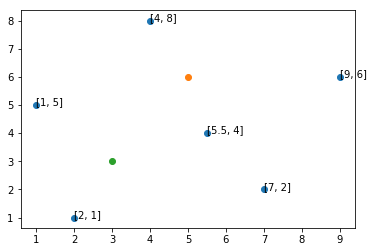

In [9]:
plt.scatter(*zip(*z))
n = [str(i) for i in z]
for i, txt in enumerate(n):
    plt.annotate(txt, (z[i][0], z[i][1]))
plt.scatter(pointa[0],pointa[1])
plt.scatter(pointb[0],pointb[1])

# 3.3 Standard Deviation

In [10]:
#*this is in the wrong section in the J companion

#De-meaning: 
#useful for understanding how entries of a vector deviate from the mean
#also gives us SD in terms of norm
de_mean = lambda x: x - np.average(x)
x = np.array([1,-2.2,3])
np.average(x), de_mean(x), np.average(de_mean(x)).round()

(0.6, array([ 0.4, -2.8,  2.4]), -0.0)

In [11]:
#Standard deviation is RMS of a de-meaned vector
#gives the typical amount that vector values deviate from mean 
x = np.random.rand(100)
stdev = lambda x:npl.norm(x-np.average(x))/np.sqrt(len(x))
stdev(x), np.std(x)

(0.29417698622563726, 0.29417698622563726)

In [12]:
standardize = lambda x: (x - np.average(x)) / rms(x - np.average(x))
x = np.random.rand(100)
z = standardize(x)
np.average(x), rms(x), np.average(z).round(), rms(z)
#Taking the average to 0 and RMS to 1

(0.5020578212236583, 0.5778046257188219, 0.0, 1.0)

# 3.4 Angle

In [13]:
# angle
ang = lambda x,y: np.arccos(np.inner(x,y)/(npl.norm(x)*npl.norm(y)))
a,b = [1,2,-1],[2,0,-3]
ang(a,b), ang(a,b)*(360/(2*np.pi))

(0.9689825515916383, 55.51861062801842)

In [14]:
# p value: correlation coefficient is the demeaned version of an angle
def correl_coef(a,b):
    a_tilde = a - np.average(a)
    b_tilde = b - np.average(b)
    return ((np.inner(a_tilde, b_tilde))/
            (npl.norm(a_tilde)*npl.norm(b_tilde)))

a = np.array([4.4,9.4,15.4,12.4,10.4,1.4,-4.6,-5.6,-.6,7.4])
b = np.array([6.2,11.2,14.2,14.2,8.2,2.2,-3.8,-4.8,-1.8,4.2])
correl_coef(a,b), ang(a,b)*(360/(2*np.pi))

(0.9678196342570433, 11.719700681146525)

# 3.5 Complexity

In [15]:
x,y = np.random.rand(10**6), np.random.randn(10**6)
%timeit correl_coef(x,y)

8.63 ms ± 825 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
